# Linear Regression

## Imports

In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load data

Define the path to the file containing the data

In [2]:
datafile = "lausanne-appart.csv"

Read the data

In [3]:
dataset = pd.read_csv(datafile)

Display first rows

In [4]:
dataset.head()

,living_area,nb_rooms,rent_price
0,69,3.0,1810
1,95,3.5,2945
2,21,1.5,685
3,20,1.0,720
4,33,1.5,830


In [5]:
# get numpy arrays from panda objects
rent_price = dataset.rent_price.values
living_area = dataset.living_area.values
print(type(rent_price))
print(rent_price.shape, living_area.shape)

<class 'numpy.ndarray'>
(201,) (201,)


## Part 1 - Visualize the data

a) Plot a histogram to visualize the distribution of the renting price

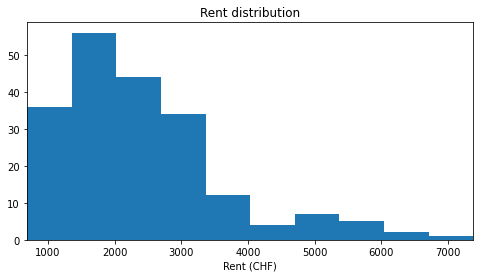

In [6]:
plt.figure(1, figsize=(8, 4))
plt.hist(rent_price)
plt.xlabel("Rent (CHF)")
plt.title("Rent distribution")
plt.xlim(np.min(rent_price), np.max(rent_price))
plt.show()

b) Plot a histogram to visualize the distribution of the living area

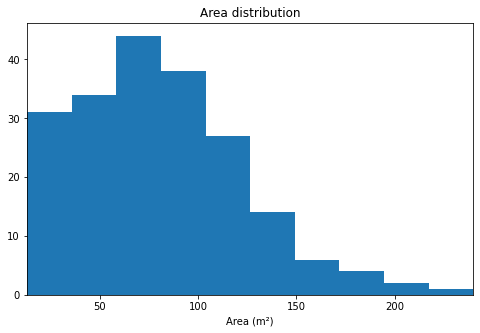

In [7]:
# Your code here
plt.hist(living_area)
plt.xlabel("Area (m²)")
plt.title("Area distribution")
plt.xlim(living_area.min(), living_area.max())
plt.show()

c) Plot a scatter plot of renting price as a function of living area

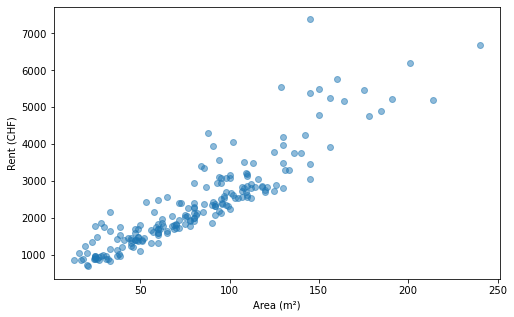

In [8]:
# Your code here
fig2 = plt.figure(2)
plt.scatter(x=living_area, label="abc", y=rent_price, alpha=.5)
plt.xlabel("Area (m²)")
plt.ylabel("Rent (CHF)")
plt.show()

## Part 2 - Normal equations for linear regression - using numpy arrays

a) Implement the closed form solution to this problem using the following normal equation:

<div><div style="display: table-cell; width: 100%;"><center>$\theta = (X^{T}X)^{-1}X^{T}\vec{y}$</center></div><div style="display: table-cell; width: 100%;">$(3)$</div></div>

Assuming $x$ is the living area and $y$ is the renting price. Use `numpy` for the vector operations. Plot the computed line on top of the scatter plot of exercise 1.

In [9]:
# Your code here
y = rent_price.astype(np.float32)
x = living_area.astype(np.float32)
N = y.shape[0]
X = np.c_[np.ones(N), x]
theta = np.linalg.inv(X.T @ X) @ X.T @ y
theta

array([240.07710727,  26.33242457])

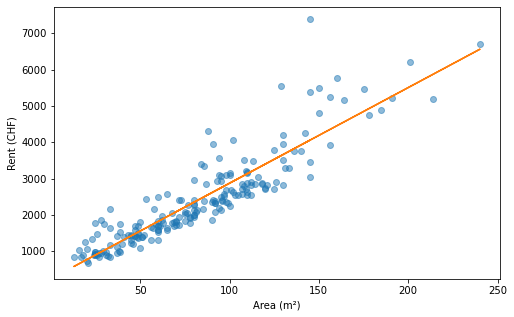

In [10]:
#h = theta[0] + theta[1] * x
h = X @ theta
fig2.gca().plot(x, h, c="C1")
fig2

b) Compute the overall cost value according to the following equation:

<div><div style="display: table-cell; width: 100%;"><center>$J(\theta) = \frac{1}{2N} \sum_{n=1}^{N} (h_{\theta}(\mathbf{x}_{n}) - y_{n})^{2}$</center></div><div style="display: table-cell; width: 100%;">$(2)$</div></div>

In [11]:
# Your code here
1 / (2 * N) * sum((h - y)**2)

138034.95779787414

## Part 3 - Normal equations for linear regression - using pytorch tensors

Redo the part 2, this time using pytorch tensors.

In [12]:
# Your code here
import torch

In [13]:
y = torch.from_numpy(rent_price.astype(np.float32))
x = torch.from_numpy(living_area.astype(np.float32))
N = y.shape[0]
X = torch.column_stack([torch.ones(N), x])
theta = torch.inverse(X.T @ X) @ X.T @ y
theta

tensor([240.0774,  26.3324])